In [1]:
# les importations
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# importation de la dataset
df = pd.read_csv('scorm_tracking_copy.csv', delimiter=';')

# Partie 1:

A partir du jeu de données original, créer:
- un Dataframe comportant tous les modules en précisant l’effectif des
apprenants, le nombre total de sessions, le score maximal, le score minimal,
le taux de réussite (pour les apprenants des scores > 50)
- un tableau 2D Numpy avec les données des 10 tops modules selon les taux
de réussites (Chaque ligne représente un module)

In [5]:
# calcule de l'effectif des apprenants pour chaque module, en faisant attention parce que les apprenants peuvent se répeter
effectif_apprenant = df.groupby("object_id").actor.nunique()
#effectif_apprenant # effectif des apprenants

In [6]:
# calcule du nombre total de session pour chaque module
nombre_total_session = df.groupby("object_id").session_uuid.count()
#nombre_total_session # nombre total de session

In [7]:
# calcule du score maximal pour chaque module
score_max = df.groupby("object_id").score.max()
#score_max # score maximal

In [8]:
# calcule du score minimal pour chaque module
score_min = df.groupby("object_id").score.min()
#score_min # score minimal

In [9]:
# calcule du nombre d'apprenant pour chaque module dont le score est >=50
# taux de ressite = (nombre_eleve_plus_de_50 x 100) / effective_apprenant
nombre_apprenant_admis = df.loc[df.score>=50].groupby("object_id").actor.nunique()
#nombre_apprenant_admis

In [11]:
# creation de mon data frame final

my_dict = {"effectif": effectif_apprenant, "nombre_total_session": nombre_total_session, "score_max": score_max, "score_min": score_min, "taux_de_reussite": (nombre_apprenant_admis*100)/effectif_apprenant}
df_tp2 = pd.DataFrame(my_dict)
#df_tp2.dropna(axis=0, inplace = True) # supprime les NaN dans le data frame
df_tp2.replace(np.nan, 0, inplace=True)
df_tp2

,effectif,nombre_total_session,score_max,score_min,taux_de_reussite
object_id,,,,,
632-le-hibou-grand-duc,1,1,0.0,0.0,0.000000
669-vallee-trient-finhaut-source-de-bien-etre,1,1,0.0,0.0,0.000000
671-presentation,340,634,100.0,0.0,90.588235
674-strategie-et-croissance,327,471,100.0,0.0,91.131498
677-affaires-medicales,322,469,100.0,0.0,91.614907
...,...,...,...,...,...
824-nescens,12,22,0.0,0.0,0.000000
825-die-dienstleistungen-f-r-den-patienten,61,156,100.0,0.0,91.803279
826-i-servizi-ai-pazienti,12,35,100.0,0.0,83.333333


In [12]:
# le data frame contenat les top 10
top_10 = df_tp2.sort_values(by='taux_de_reussite', ascending=False).head(10)
top_10

,effectif,nombre_total_session,score_max,score_min,taux_de_reussite
object_id,,,,,
752-etudes-de-cas-et-questions,123,216,100.0,0.0,99.186992
734-risques-psychosociaux,124,153,100.0,0.0,98.387097
819-informatique,59,68,100.0,0.0,98.305085
755-verhalten-des-mitarbeitenden,94,233,100.0,0.0,97.872340
761-fallstudien-und-fragen,89,242,100.0,0.0,97.752809
765-urlaub,88,308,100.0,0.0,97.727273
766-unbezahlter-urlaub,88,188,100.0,0.0,97.727273
729-salaire,129,255,100.0,0.0,97.674419
747-modification-des-rapports-de-travail,124,242,100.0,0.0,97.580645


In [10]:
# conversion du data frame en tableau numpy
np_array = np.array(top_10)
#np_array

# Partie 2:

Pour le top module et le dernier:
- créer un Dataframe avec les données résumées de chaque apprenants:
nombre total de sessions, nombre total de temps, score, resultat final (de
valeur 0 si score < 50 et 1 sinon)

In [28]:
# determination du nom du top module
taux_max = max(top_10.taux_de_reussite)
top_module = top_10.loc[top_10.taux_de_reussite == taux_max]
name_top_module = top_module.index[0]
name_top_module # le nom du premier module des tops 10

'752-etudes-de-cas-et-questions'

In [29]:
# determination du nom du dernier module
taux_min = min(top_10.taux_de_reussite)
dernier_module = top_10.loc[top_10.taux_de_reussite == taux_min]
#dernier_module
name_dernier_module = dernier_module.index[0]
name_dernier_module # les nom des dernier module des tops 10

'736-conge-non-paye'

## Pour le top module:

In [18]:
# le data frame dont le nom de module correspond au nom du top module trié par un nombre précis de champ voulue
df_tm = df.loc[df.object_id == name_top_module, ["actor","session_uuid","object_id","score","temps"]]
#df_tm

In [50]:
# calcul du nombre total de session pour le top module regrouper par apprenant
nbre_total_session_tm = df_tm.groupby("actor").session_uuid.nunique()
#nbre_total_session_tm

In [49]:
# calcul du nombre total de temps pour le top module régroupé par apprenant
nbre_total_temps_tm = df_tm.groupby("actor").temps.sum()
#nbre_total_temps_tm

In [48]:
# calcul du score maximal pour le top modul régroupé par apprenant
score_tm = df_tm.groupby("actor").score.max()
#score_tm

In [22]:
# fonction permettant de retourner 0 ou 1 en fonction de la valeur donnée comme paramettre
def resultat(value):
    ''' 
        retourne 0 ou 1 en fonction de la valeur donnée en paramettre
        param: entier
        retour: 0 ou 1
    '''
    if value >=50:
        return 1
    else:
        return 0

In [47]:
# calcul de la colonne pour le résultat final (1 si score>= et 0 sinon)
resultat_final_tm = score_tm.map(lambda x: resultat(x)) # la fonction joue sur les Series
#resultat_final_tm

In [46]:
# creation du data frame final à partir des données precedemment calculer
top_module_dict = {"nbre_total_session": nbre_total_session_tm, "nbre_total_temps": nbre_total_temps_tm, "score": score_tm, "resultat":resultat_final_tm}
df_top_modul = pd.DataFrame(top_module_dict)
#df_top_modul

## Pour le dernier module:

In [45]:
# la data frame dont le nom de module correspond au nom du dernier module trié par un nombre précis de champ voulue
df_dm = df.loc[df.object_id == name_dernier_module, ["actor","session_uuid","object_id","score","temps"]]
#df_dm

In [44]:
# calcul du nombre total de session pour le dernier module regrouper par apprenant
nbre_total_session_dm = df_dm.groupby("actor").session_uuid.nunique()
#nbre_total_session_dm

In [43]:
# calcul du nombre total de temps pour le dernier module régroupé par apprenant
nbre_total_temps_dm = df_dm.groupby("actor").temps.sum()
#nbre_total_temps_dm

In [42]:
# calcul du score maximal pour le dernier modul régroupé par apprenant
score_dm = df_dm.groupby("actor").score.max()
#score_dm

In [41]:
# calcul de la colonne pour le résultat final (1 si score>=50 et 0 sinon)
resultat_final_dm = score_dm.map(lambda x: resultat(x)) # la fonction joue sur les Series
#resultat_final_dm

In [25]:
# creation du data frame final à partir des données precedemment calculer
last_module_dict = {"nbre_total_session": nbre_total_session_dm, "nbre_total_temps": nbre_total_temps_dm, "score": score_dm, "resulat": resultat_final_dm}
df_last_modul = pd.DataFrame(last_module_dict)
#df_last_modul

# Partie 3: Les graphes

## Pour les 10 top module:
- Représenter par une courbe ces derniers dans un même repère sur une figure unique. A chaque apprenant correspond un point dont l’abscisse est le temps en minutes de celui-ci. L’ordonné est déterminé par son score maximum.
- Un diagramme en bâton avec le taux de réussite de chaque module.


In [52]:
# fonction pour obtenir le nom d'un module precis du top 10 des module
def get_module_name(index):
    return top_10.index[index]

In [53]:
def get_all_module_name(index):
    return df.object_id[index]

In [54]:
# fonction pour obtenir la liste des noms des apprenants d'un module precis
def get_list_learner_names(module_name):
    learners_from_module = df.loc[df.object_id == module_name, ["object_id","actor"]]
    learner_names = learners_from_module.groupby("object_id").actor.unique().values
    return learner_names

In [55]:
def get_df_leaner_for_module(name_of_learner, module_name):
     # obtention d'un data frame contenant la liste des score et leur temps pour un apprenant precis dans un module precis
    df_learner = df[["actor", "object_id", "score", "temps"]].where((df.actor == name_of_learner) & (df.object_id == module_name)).dropna(axis=0)
    return df_learner

In [56]:
# fonction pour obtenit le score maximal pour un apprenant dans un module precis
def get_score_max(df_learner):
    # obtention du score maximal
    score_max = df_learner["score"].max()
    return score_max

In [57]:
# fonction pour obtenir le data frame des score maximal
def get_df_score_max(df_learner, score_max):
    # obtention du data frame contenant uniquement le score maximal avec les differents temps
    df_score_max = df_learner.loc[df_learner.score == score_max]
    return df_score_max

In [58]:
# fonction pour obtenit le time minimal pour un score maximal donnée
def get_time_min(df_score_max):
    # obtention du temps minimal
    time_series = df_score_max.groupby("score").temps.min()
    time_min = time_series.values[0]/60
    return time_min

In [59]:
def get_total_time(df_learner):
    total_time = df_learner["temps"].sum()
    return total_time

In [60]:
# fonction pour obtenir le data frame du score et du temps d'un apprenant pour un module precis
def get_df_score_time_for_module(index):
    score_list = []
    time_list = []
    # obtention du  nom du module
    module_name = get_module_name(index=index)
    # obtention de la liste des apprenants d'un module precis
    learner_names = get_list_learner_names(module_name=module_name)
    # obtention du score et du temps pour un apprenant precis d'un module precis
    for i in range(len(learner_names[0])):
        df_learner = get_df_leaner_for_module(name_of_learner=learner_names[0][i], module_name=module_name)
        score_max = get_score_max(df_learner=df_learner)
        df_score_max = get_df_score_max(df_learner=df_learner, score_max=score_max)
        time_min = get_time_min(df_score_max=df_score_max)
        score_list.append(score_max)
        time_list.append(time_min)
    # creation et renvoi de notre data frame
    return pd.DataFrame({"score": score_list,"temps": time_list})

In [61]:
# fonction pour obtenir le data frame du score, du temps total et du rang d'un apprenant pour un module precis
def get_df_score_total_time_for_module(index):
    score_list = []
    time_list = []
    # obtention du  nom du module
    module_name = get_all_module_name(index=index)
    # obtention de la liste des apprenants d'un module precis
    learner_names = get_list_learner_names(module_name=module_name)
    # obtention du score et du temps pour un apprenant precis d'un module precis
    for i in range(len(learner_names[0])):
        df_learner = get_df_leaner_for_module(name_of_learner=learner_names[0][i], module_name=module_name)
        score_max = get_score_max(df_learner=df_learner)
        total_time = get_total_time(df_learner=df_learner)
        score_list.append(score_max)
        time_list.append(total_time)
    # creation et renvoi de notre data frame
    df_final = pd.DataFrame({"score_max": score_list,"temps_total": time_list})
    df_final.sort_values(by=["score_max", "temps_total"], ascending=[False, True], inplace=True)
    df_final["rang"] = [i+1 for i in range(len(df_final))]
    return df_final

In [62]:
# fonction pour trier, par temps, un data frame dans lordre croissant
def sort_df(df):
    return df.sort_values(by="temps")

In [63]:
top_module_0 = sort_df(get_df_score_time_for_module(0))
top_module_1 = sort_df(get_df_score_time_for_module(1))
top_module_2 = sort_df(get_df_score_time_for_module(2))
top_module_3 = sort_df(get_df_score_time_for_module(3))
top_module_4 = sort_df(get_df_score_time_for_module(4))
top_module_5 = sort_df(get_df_score_time_for_module(5))
top_module_6 = sort_df(get_df_score_time_for_module(6))
top_module_7 = sort_df(get_df_score_time_for_module(7))
top_module_8 = sort_df(get_df_score_time_for_module(8))
top_module_9 = sort_df(get_df_score_time_for_module(9))

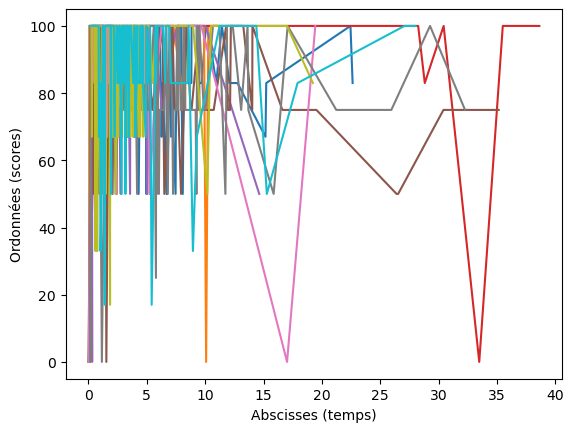

In [65]:
# la courbe dont chaque point representre un apprenant
fig, ax = plt.subplots()
ax.plot(top_module_0["temps"], top_module_0["score"], label='top 0')
ax.plot(top_module_1["temps"], top_module_1["score"], label='top 1')
ax.plot(top_module_2["temps"], top_module_2["score"], label='top 2')
ax.plot(top_module_3["temps"], top_module_3["score"], label='top 3')
ax.plot(top_module_4["temps"], top_module_4["score"], label='top 4')
ax.plot(top_module_5["temps"], top_module_5["score"], label='top 5')
ax.plot(top_module_6["temps"], top_module_6["score"], label='top 6')
ax.plot(top_module_7["temps"], top_module_7["score"], label='top 7')
ax.plot(top_module_8["temps"], top_module_8["score"], label='top 8')
ax.plot(top_module_9["temps"], top_module_9["score"], label='top 9')


ax.set_xlabel("Abscisses (temps)")
ax.set_ylabel("Ordonnées (scores)")

plt.show()

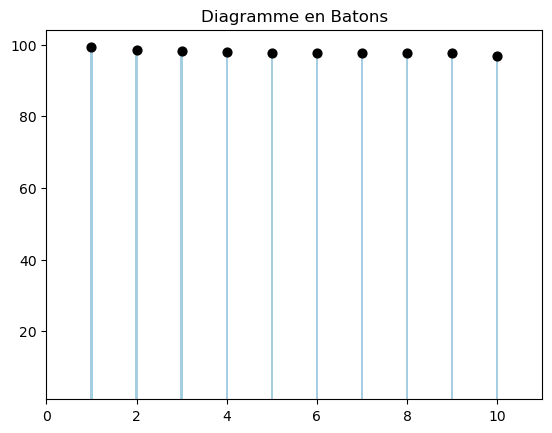

In [39]:
# le positionnement par rapport à l'axe des abscisses
x = [1,2,3,4,5,6,7,8,9,10]
# le positionnement par rapport à l'axe des ordonnées
height = top_10["taux_de_reussite"]
# la largeur de chaque bar
width = 0.05

# reglage sur les bars
plt.bar(x, height, width, color=(0.65098041296005249, 0.80784314870834351, 0.89019608497619629, 1))
# le reglage des point noir sur le bout des bars
plt.scatter(x,height,color='k',s=40)

# xlim determine la valeur maximal de la graduation. Si c'est 0.11 allors la valeur maximal est 11
plt.xlim(0,11)
# ylim determine la valeur maximal de la graduation. Si c'est 0.14 allors la valeur maximal est 14
plt.ylim(1)
plt.title('Diagramme en Batons')

plt.show()

## Pour les 3 top module:
Représenter par une courbe chacun dans un même repère différent sur une même figure horizontalement subdivisée en trois.
A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. 
L’ordonné est déterminé par son score maximum.

In [40]:
df_top_3 = top_10.head(3)

In [41]:
top_module_0["rang"] = [i+1 for i in range(len(top_module_0))]
top_module_1["rang"] = [i+1 for i in range(len(top_module_1))]
top_module_2["rang"] = [i+1 for i in range(len(top_module_2))]

In [42]:
def display_3_fig(nb_fig):
    fig, ax = plt.subplots(nb_fig, 1,sharex=True)
    fig.subplots_adjust(hspace=0)
    for i in range(nb_fig):
        ax[i].plot(top_module_0["rang"], top_module_0["score"])
        
        ax[i].set_xlabel("Rang")
        ax[i].set_ylabel("Score Max")
       
        ax[i].set_title(df_top_3.index[i]);

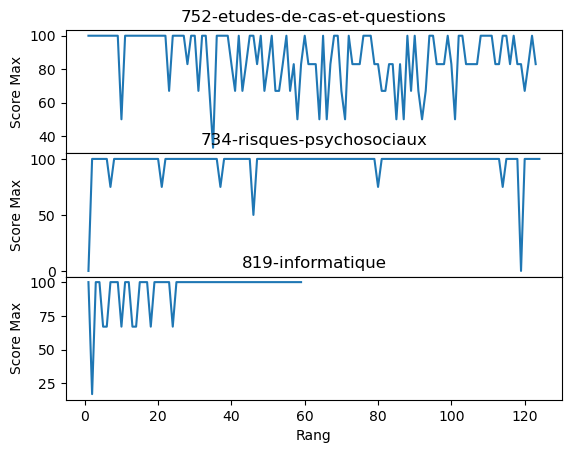

In [43]:
fig, ax = plt.subplots(3, 1,sharex=True)
fig.subplots_adjust(hspace=0)
ax[0].plot(top_module_0["rang"], top_module_0["score"])
ax[1].plot(top_module_1["rang"], top_module_1["score"])
ax[2].plot(top_module_2["rang"], top_module_2["score"])

ax[0].set_xlabel("Rang")
ax[1].set_xlabel("Rang")
ax[2].set_xlabel("Rang")

ax[0].set_ylabel("Score Max")
ax[1].set_ylabel("Score Max")
ax[2].set_ylabel("Score Max")

ax[0].set_title(df_top_3.index[0]);
ax[1].set_title(df_top_3.index[1]);
ax[2].set_title(df_top_3.index[2]);

# Pour tous les modules:
- Représenter l’ensemble par un nuage de points dans un même repère sur une même figure. A chaque apprenant correspond un point dont l’abscisse est le rang de celui-ci. L’ordonné est déterminé par le temps global sur le module.
- Un camembert avec le taux des modules catégorisés en quatre classes: 
    - Classe A: taux de réussite > = 80%
    - Classe B: taux de réussite > = 60%
    - Classe C: taux de réussite > = 50%
    - Classe D: taux de réussite < 50%


In [55]:
df_p3 = df[["id", "actor", "object_id", "score", "temps"]]
name_all_module = df_p3.groupby("object_id").object_id.unique().index
total_time_module = df_p3.groupby("object_id").temps.sum()
score_max_module = df_p3.groupby("object_id").score.max()
df_scatter = pd.DataFrame({"score_max": score_max_module, "temps_total": total_time_module/60})
df_scatter.sort_values(by=["score_max"], ascending=False, inplace=True)
df_scatter.head(40)
#df_scatter["rang"] = [i+1 for i in range(len(df_scatter))]

,score_max,temps_total
object_id,,
752-etudes-de-cas-et-questions,100.0,892.600000
723-medizinischer-bereich,100.0,2073.083333
763-schwangerschaft-und-mutterschutz,100.0,1300.350000
762-jugendliche,100.0,433.466667
761-fallstudien-und-fragen,100.0,614.033333
759-gehalt,100.0,848.850000
758-probezeit,100.0,782.383333
757-verpflichtungen-von-arbeitgeber-und-arbeitnehmer,100.0,742.633333
756-arbeitsvertrage,100.0,1425.000000


Text(0, 0.5, 'y (Temps global)')

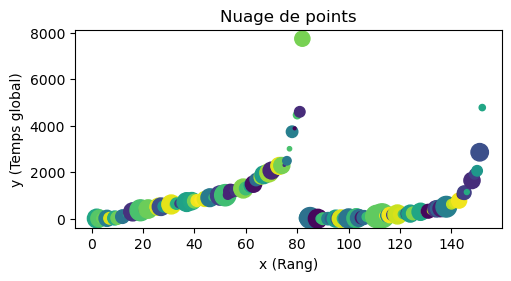

In [45]:
data = {'x':df_scatter["rang"],
        'c': np.random.randint(0, 50, len(df_scatter)),
        'd': np.random.randn(len(df_scatter))}
data['y'] = df_scatter["temps_total"]
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('x', 'y', c='c', s='d', data=data)

plt.title('Nuage de points')
plt.xlabel('x (Rang)')
plt.ylabel('y (Temps global)')

In [46]:
df_camembert = df_tp2.copy()
df_camembert["classe"] = "A"
def categorie():
    df_camembert.loc[(df_camembert["taux_de_reussite"]>=80), 'classe'] = 'A'
    df_camembert.loc[(df_camembert["taux_de_reussite"]<80) & (df_camembert["taux_de_reussite"]>=60), 'classe'] = 'B'
    df_camembert.loc[(df_camembert["taux_de_reussite"]<60) & (df_camembert["taux_de_reussite"]>=50), 'classe'] = 'C'
    df_camembert.loc[(df_camembert["taux_de_reussite"]<50), 'classe'] = 'D'
            
categorie()

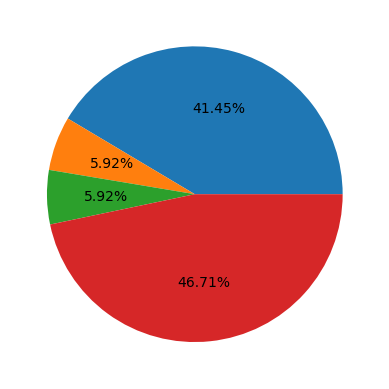

In [47]:
x = df_camembert.groupby("classe").classe.count()
plt.pie(x, autopct = '%1.2f%%');